In [1]:
%matplotlib inline
#%pylab
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mpc
import matplotlib.dates as dts
import numpy as np
import pandas as pd
import itertools
import os
import ROOT
import datetime
from root_numpy import root2array, root2rec, tree2rec, array2root
from scipy.optimize import curve_fit
from scipy.misc import factorial

Welcome to JupyROOT 6.10/04


In [2]:
plt.rcParams.update({'font.size': 18})

In [3]:
f_elec = ROOT.TFile('/home/david/data/MCC9/November/bnb_bnbnue_cosmics_shrreco.root')
f_elec.cd('showerreco3dpandora')
t_elec = f_elec.Get('showerreco3dpandora/_rcshr_tree')
df_elec = pd.DataFrame( tree2rec(t_elec) )
print df_elec.shape
print df_elec.keys()

/home/david/.local/lib/python2.7/site-packages/root_numpy/_tree.py:471: DeprecationWarning: tree2rec is deprecated and will be removed in 5.0.0. Instead use tree2array(...).view(np.recarray)
  DeprecationWarning)


(185062, 23)
Index([u'_shr_x', u'_xtimeoffset', u'_xsceoffset', u'_shr_y', u'_shr_z',
       u'_shr_dedx_pl0_v', u'_shr_dedx_pl1_v', u'_shr_dedx_pl2_v', u'_shr_e_v',
       u'_shr_dedx_v', u'_shr_px', u'_shr_py', u'_shr_pz', u'_completeness',
       u'_purity', u'_mc_shr_pdg', u'_mc_shr_e', u'_mc_shr_x', u'_mc_shr_y',
       u'_mc_shr_z', u'_mc_shr_px', u'_mc_shr_py', u'_mc_shr_pz'],
      dtype='object')


Warning in <TClass::Init>: no dictionary for class ROOT::TIOFeatures is available


In [5]:
df_elec_good = df_elec.query('_purity>0.1 and abs(_shr_pz) > 0.3')

In [6]:
dedx_all_elec_v = np.array(df_elec_good['_shr_dedx_v'].values)
#dedx_elec_v = dedx_all_elec_v.flatten() # this collapses an array like [[1,2],[3,4]] to 1D: [1,2,3,4]
dedx_elec_v = []
for dedxv in dedx_all_elec_v:
    for dedx in dedxv:
        dedx_elec_v.append(dedx)

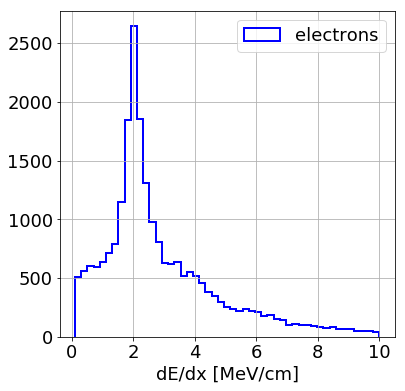

In [19]:
fig = plt.figure(figsize=(6,6))
BINS = np.linspace(0.1,10,50)
#plt.hist(dedx_gamma_v,bins=BINS,histtype='step',color='r',lw=2,normed=True,label='photons')
plt.hist(dedx_elec_v ,bins=BINS,histtype='step',lw=2,color='b',normed=False,label='electrons')
plt.grid()
plt.xlabel('dE/dx [MeV/cm]')
plt.legend(loc=1)
plt.show()

In [20]:
# apply binning

# electrons
vals_elec,bine_elec = np.histogram(dedx_elec_v,bins=BINS)
binc_elec = 0.5*(bine_elec[1:]+bine_elec[:-1])

In [8]:
from scipy.optimize import curve_fit

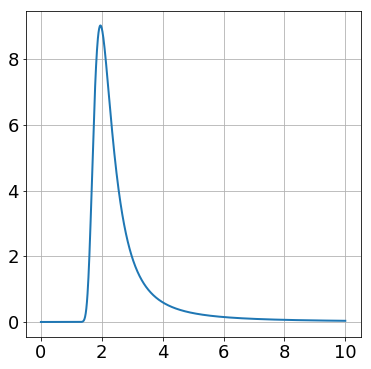

In [18]:
def Landau(x,A,mpv,sigma):
    return A * ROOT.TMath.Landau(x,mpv,sigma,ROOT.kTRUE)

Landau_v = np.vectorize(Landau)

xvals = np.linspace(0,10,1000)
yvals = Landau_v(xvals,10.,2.0,0.2)

fig = plt.figure(figsize=(6,6))
plt.plot(xvals,yvals,lw=2)
plt.grid()
plt.show()

In [32]:
guess_elec  = [200.,1.9,0.1]
popt_elec ,popv_elec = curve_fit(Landau_v,binc_elec[30:-1] ,vals_elec[30:-1],p0=guess_elec,bounds=([200,1.7,0],[5000,2.2,0.4]))

In [33]:
print(popt_elec)

[5.0e+03 2.2e+00 4.0e-01]


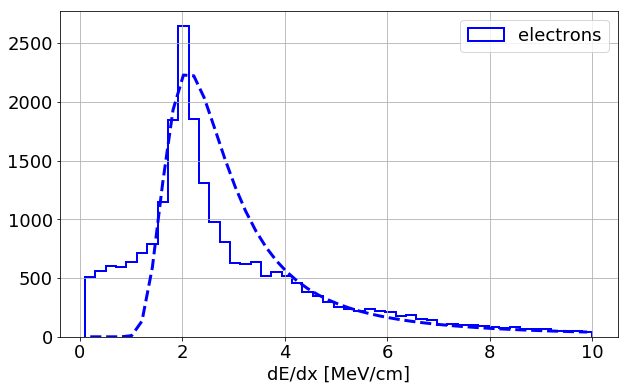

In [34]:
fig = plt.figure(figsize=(10,6))

#plt.hist(dedx_gamma_v,bins=BINS,histtype='step',color='r',lw=2,normed=True,label='photons')
plt.hist(dedx_elec_v ,bins=BINS,histtype='step',lw=2,color='b',normed=False,label='electrons')

#plt.plot(binc_gamma,langau(binc_gamma,*popt_gamma),'r--',lw=3)
plt.plot(binc_elec,Landau_v(binc_elec,*popt_elec),'b--',lw=3)
plt.grid()
plt.xlabel('dE/dx [MeV/cm]')
plt.legend(loc=1)
plt.show()